Generate a test to feature the exploratory analysis on resampling climate extreme data.

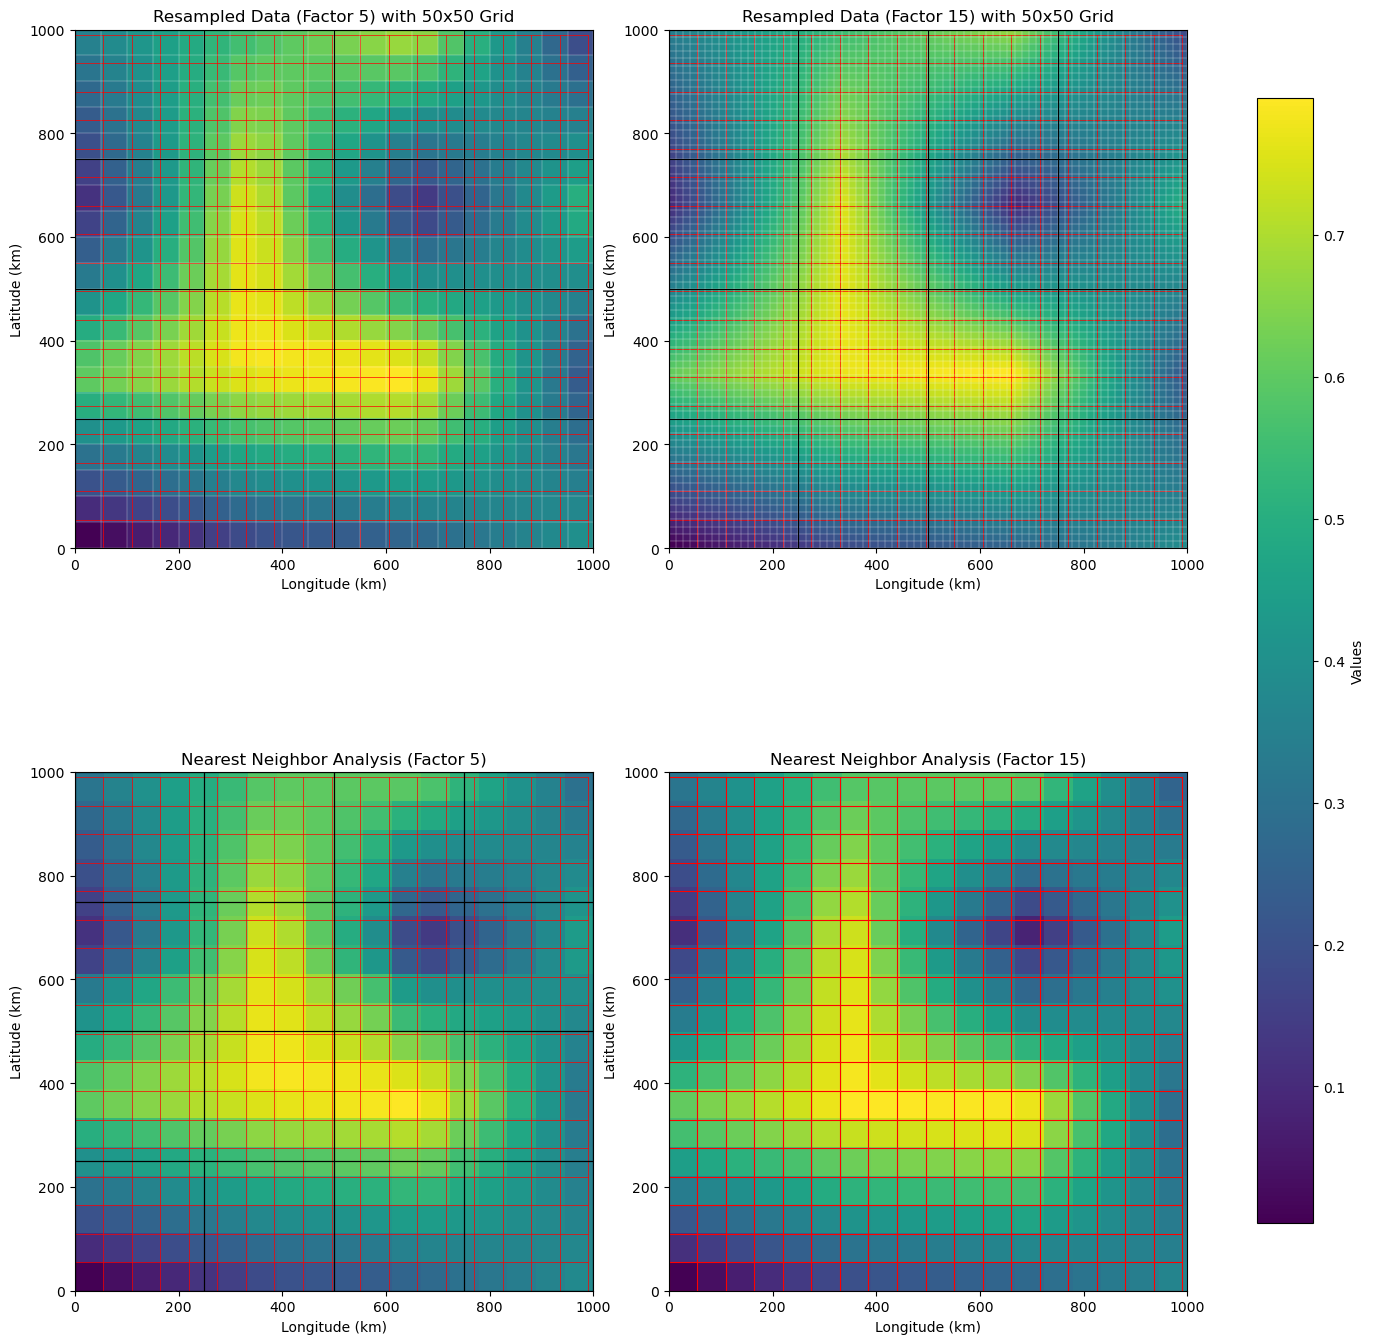

In [41]:
# Reinitialize the environment and import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

# Define the extent of the raster (longitude, latitude bounds)
extent = [0, 1000, 0, 1000]  # Example extent in km (1000x1000 km)

# Generate 250km resolution grid
resolution_250km = 250  # Coarse grid cell size
x_250km = np.arange(extent[0], extent[1] + resolution_250km, resolution_250km)
y_250km = np.arange(extent[2], extent[3] + resolution_250km, resolution_250km)
xx_250km, yy_250km = np.meshgrid(x_250km, y_250km)

# Assign random values to the 250km grid
values_250km = np.random.rand(len(y_250km) - 1, len(x_250km) - 1)

# Generate 50km resolution grid
resolution_50km = 55  # Target grid cell size
# Define updated 50x50 grid (ensuring max extent does not exceed 1000)
x_50km = np.arange(extent[0], min(extent[1], extent[0] + 1000), resolution_50km)
y_50km = np.arange(extent[2], min(extent[3], extent[2] + 1000), resolution_50km)
xx_50km, yy_50km = np.meshgrid(x_50km, y_50km)

# Resample using factor 5 (LCM-based resolution)
resample_factor_5 = 5
resampled_values_factor_5 = zoom(values_250km, resample_factor_5, order=1)

# Resample using factor 15 (demonstrating misalignment)
resample_factor_15 = 18
resampled_values_factor_15 = zoom(values_250km, resample_factor_15, order=1)

# Prepare grids for resampled data
resampled_x_factor_5 = np.linspace(extent[0], extent[1], resampled_values_factor_5.shape[1])
resampled_y_factor_5 = np.linspace(extent[2], extent[3], resampled_values_factor_5.shape[0])

resampled_x_factor_15 = np.linspace(extent[0], extent[1], resampled_values_factor_15.shape[1])
resampled_y_factor_15 = np.linspace(extent[2], extent[3], resampled_values_factor_15.shape[0])

# Compute nearest neighbor analysis for factor 5
nearest_values_50km_factor_5 = np.zeros((len(y_50km) - 1, len(x_50km) - 1))
center_x_50km = x_50km[:-1] + resolution_50km / 2
center_y_50km = y_50km[:-1] + resolution_50km / 2

resampled_x_centers_5 = resampled_x_factor_5 + (resampled_x_factor_5[1] - resampled_x_factor_5[0]) / 2
resampled_y_centers_5 = resampled_y_factor_5 + (resampled_y_factor_5[1] - resampled_y_factor_5[0]) / 2

for i, cy in enumerate(center_y_50km):
    for j, cx in enumerate(center_x_50km):
        nearest_x_idx = np.argmin(np.abs(resampled_x_centers_5 - cx))
        nearest_y_idx = np.argmin(np.abs(resampled_y_centers_5 - cy))
        nearest_values_50km_factor_5[i, j] = resampled_values_factor_5[nearest_y_idx, nearest_x_idx]

# Compute nearest neighbor analysis for factor 15
nearest_values_50km_factor_15 = np.zeros_like(nearest_values_50km_factor_5)

resampled_x_centers_15 = resampled_x_factor_15 + (resampled_x_factor_15[1] - resampled_x_factor_15[0]) / 2
resampled_y_centers_15 = resampled_y_factor_15 + (resampled_y_factor_15[1] - resampled_y_factor_15[0]) / 2

for i, cy in enumerate(center_y_50km):
    for j, cx in enumerate(center_x_50km):
        nearest_x_idx = np.argmin(np.abs(resampled_x_centers_15 - cx))
        nearest_y_idx = np.argmin(np.abs(resampled_y_centers_15 - cy))
        nearest_values_50km_factor_15[i, j] = resampled_values_factor_15[nearest_y_idx, nearest_x_idx]

# Create a 2x2 plot to visualize the results with white boundaries for resampled resolutions
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

# Top-left: Resampled data with factor 5
ax[0, 0].imshow(resampled_values_factor_5, extent=extent, origin="lower", cmap="viridis")
ax[0, 0].plot(xx_50km, yy_50km, color='red', linewidth=0.5)  # 50x50 grid overlay
ax[0, 0].plot(xx_50km.T, yy_50km.T, color='red', linewidth=0.5)

# Add very thin white lines for resampled resolution (factor 5)
resampled_x_edges_5 = np.linspace(extent[0], extent[1], resampled_values_factor_5.shape[1] + 1)
resampled_y_edges_5 = np.linspace(extent[2], extent[3], resampled_values_factor_5.shape[0] + 1)
for edge_x in resampled_x_edges_5:
    ax[0, 0].axvline(edge_x, color='white', linewidth=0.2)
for edge_y in resampled_y_edges_5:
    ax[0, 0].axhline(edge_y, color='white', linewidth=0.2)

ax[0, 0].plot(xx_250km, yy_250km, color='black', linewidth=0.8)
ax[0, 0].plot(xx_250km.T, yy_250km.T, color='black', linewidth=0.8)

ax[0, 0].set_title("Resampled Data (Factor 5) with 50x50 Grid")
ax[0, 0].set_xlabel("Longitude (km)")
ax[0, 0].set_ylabel("Latitude (km)")

# Top-right: Resampled data with factor 15
ax[0, 1].imshow(resampled_values_factor_15, extent=extent, origin="lower", cmap="viridis")
ax[0, 1].plot(xx_50km, yy_50km, color='red', linewidth=0.5)  # 50x50 grid overlay
ax[0, 1].plot(xx_50km.T, yy_50km.T, color='red', linewidth=0.5)

# Add very thin white lines for resampled resolution (factor 15)
resampled_x_edges_15 = np.linspace(extent[0], extent[1], resampled_values_factor_15.shape[1] + 1)
resampled_y_edges_15 = np.linspace(extent[2], extent[3], resampled_values_factor_15.shape[0] + 1)
for edge_x in resampled_x_edges_15:
    ax[0, 1].axvline(edge_x, color='white', linewidth=0.2)
for edge_y in resampled_y_edges_15:
    ax[0, 1].axhline(edge_y, color='white', linewidth=0.2)

ax[0, 1].plot(xx_250km, yy_250km, color='black', linewidth=0.8)
ax[0, 1].plot(xx_250km.T, yy_250km.T, color='black', linewidth=0.8)

ax[0, 1].set_title("Resampled Data (Factor 15) with 50x50 Grid")
ax[0, 1].set_xlabel("Longitude (km)")
ax[0, 1].set_ylabel("Latitude (km)")

# Bottom-left: Nearest neighbor analysis for factor 5
ax[1, 0].imshow(nearest_values_50km_factor_5, extent=extent, origin="lower", cmap="viridis")
ax[1, 0].plot(xx_50km, yy_50km, color='red', linewidth=0.5)
ax[1, 0].plot(xx_50km.T, yy_50km.T, color='red', linewidth=0.5)
ax[1, 0].plot(xx_250km, yy_250km, color='black', linewidth=0.8)
ax[1, 0].plot(xx_250km.T, yy_250km.T, color='black', linewidth=0.8)
ax[1, 0].set_title("Nearest Neighbor Analysis (Factor 5)")
ax[1, 0].set_xlabel("Longitude (km)")
ax[1, 0].set_ylabel("Latitude (km)")

# Bottom-right: Nearest neighbor analysis for factor 15
ax[1, 1].imshow(nearest_values_50km_factor_15, extent=extent, origin="lower", cmap="viridis")
ax[1, 1].plot(xx_50km, yy_50km, color='red', linewidth=0.8)
ax[1, 1].plot(xx_50km.T, yy_50km.T, color='red', linewidth=0.8)
ax[1, 0].plot(xx_250km, yy_250km, color='black', linewidth=0.8)
ax[1, 0].plot(xx_250km.T, yy_250km.T, color='black', linewidth=0.8)
ax[1, 1].set_title("Nearest Neighbor Analysis (Factor 15)")
ax[1, 1].set_xlabel("Longitude (km)")
ax[1, 1].set_ylabel("Latitude (km)")

plt.tight_layout()
plt.colorbar(ax[0, 0].images[0], ax=ax, location="right", shrink=0.8, label="Values")
plt.show()

This introduces the issue but does not incorporate the consideration of inconsistency in area produced by the projection away from the equator. 

This will then be introduced in the next cell where we project a mock prio grid and HADGEM model (250x250) grid

### Steps:
#### Generate Global Grids:

- Create a global .5° x .5° grid in latitude/longitude coordinates.
- Create a global 2.25° x 2.25° grid (approx. 250 x 250 km).

#### Subset Both Grids:
- Subset the .5° x .5° grid for longitude -5° to 5° and latitude 25° to 35°.
- Subset the 2.25° x 2.25° grid for the same region.

#### Transform to Mercator:
- Transform both subsets to the Mercator projection for visualization.
- Assign Random Values:
- Assign random values to the subset of 2.25° x 2.25° grid cells.

#### Plot Overlap:
- Overlay the .5° x .5° grid and 2.25° x 2.25° grid to show misalignment, with random values assigned to the 2.25° x 2.25° grid cells.

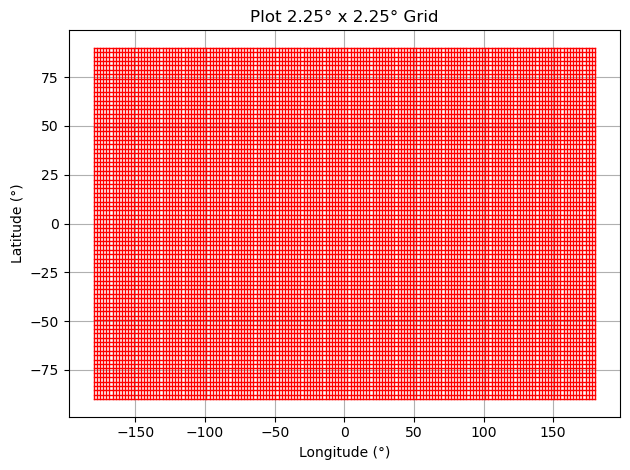

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Proj

# Define Mercator projection (EPSG:3857)
mercator_proj = Proj(proj="merc", ellps="WGS84")

# Define global .5° x .5° grid in lat/lon
lon_res_05 = 0.5
lat_res_05 = 0.5
lon_extent_05 = np.arange(-180, 180 + lon_res_05, lon_res_05)
lat_extent_05 = np.arange(-90, 90 + lat_res_05, lat_res_05)
lon_grid_05, lat_grid_05 = np.meshgrid(lon_extent_05, lat_extent_05)

# Define global 2.25° x 2.25° grid (approx. 250 km)
lon_res_225 = 2.25
lat_res_225 = 2.25
lon_extent_225 = np.arange(-180, 180 + lon_res_225, lon_res_225)
lat_extent_225 = np.arange(-90, 90 + lat_res_225, lat_res_225)
lon_grid_225, lat_grid_225 = np.meshgrid(lon_extent_225, lat_extent_225)

# Overlay the 2.25° x 2.25° grid in red
plt.plot(lon_grid_225, lat_grid_225, color='red', linewidth=1, label='2.25° x 2.25° Grid')
plt.plot(lon_grid_225.T, lat_grid_225.T, color='red', linewidth=1)

# Add labels and title
plt.xlabel("Longitude (°)")
plt.ylabel("Latitude (°)")
plt.title("Plot 2.25° x 2.25° Grid")
plt.grid(True)
plt.tight_layout()
plt.show()


## Incorporate values to begin the analytic demo

In [80]:
import rasterio
from rasterio.transform import from_origin

# Define parameters for the 2.25 x 2.25 degree grid as a raster in Mercator
cell_size_mercator = 250000  # 250 km in meters (approx. size of a 2.25 x 2.25 degree cell)
subset_width = 5 - (-5)  # Width of the subset in degrees
subset_height = 35 - 25  # Height of the subset in degrees
raster_cols = int(subset_width * 111000 / cell_size_mercator)  # Number of columns in the raster
raster_rows = int(subset_height * 111000 / cell_size_mercator)  # Number of rows in the raster

# Define random values for the raster
random_values = np.random.rand(raster_rows, raster_cols) * 5 + 1  # Scale to range [1, 6]

# Create a transform for the raster
transform = from_origin(-5 * 111000, 35 * 111000, cell_size_mercator, cell_size_mercator)

# Write the raster to a file for further analysis
raster_file = "tmp_raster.tif"

with rasterio.open(
    raster_file,
    "w",
    driver="GTiff",
    height=random_values.shape[0],
    width=random_values.shape[1],
    count=1,
    dtype=random_values.dtype,
    crs="EPSG:3857",
    transform=transform,
) as dst:
    dst.write(random_values, 1)

# Confirm the raster creation
print(f"Raster written to {raster_file} with random values.")


Raster written to tmp_raster.tif with random values.


## subset

/var/folders/1w/33c1s5gx5bq1358nxn0pmzlw0000gn/T/ipykernel_7693/317190156.py:54: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


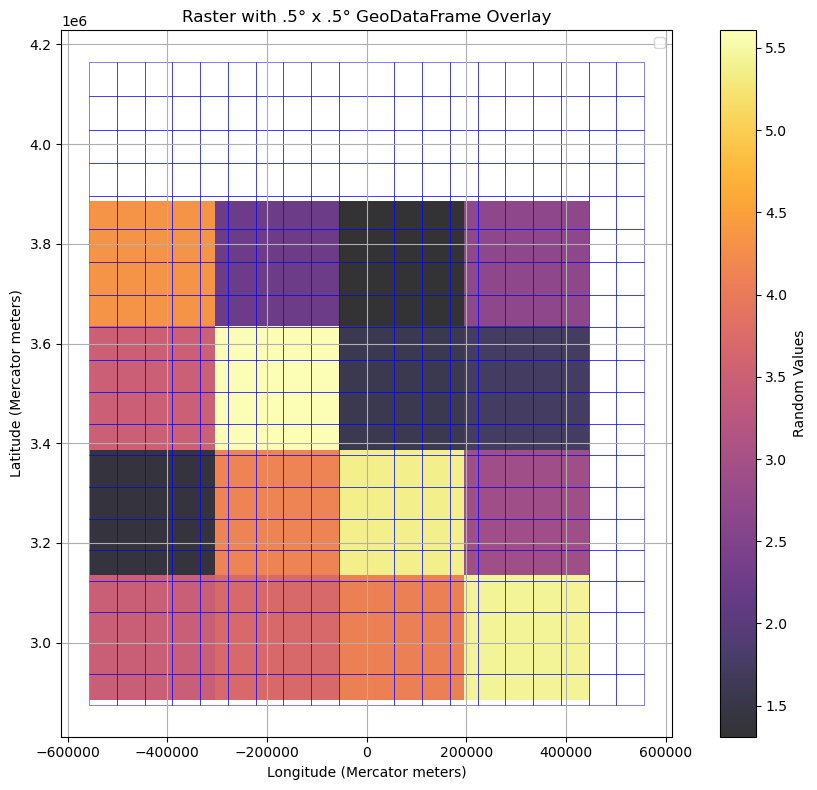

In [82]:
from shapely.geometry import box
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# Subset parameters
subset_lon_min, subset_lon_max = -5, 5
subset_lat_min, subset_lat_max = 25, 35

# Define .5° x .5° grid
lon_res_05 = 0.5
lat_res_05 = 0.5
lon_extent_05 = np.arange(-180, 180 + lon_res_05, lon_res_05)
lat_extent_05 = np.arange(-90, 90 + lat_res_05, lat_res_05)
lon_subset_05 = lon_extent_05[(lon_extent_05 >= subset_lon_min) & (lon_extent_05 <= subset_lon_max)]
lat_subset_05 = lat_extent_05[(lat_extent_05 >= subset_lat_min) & (lat_extent_05 <= subset_lat_max)]

# Create GeoDataFrame for .5° x .5° grid
polygons_05 = [
    box(lon_subset_05[j], lat_subset_05[i], lon_subset_05[j + 1], lat_subset_05[i + 1])
    for i in range(len(lat_subset_05) - 1)
    for j in range(len(lon_subset_05) - 1)
]
gdf_05 = gpd.GeoDataFrame({"geometry": polygons_05}, crs="EPSG:4326")

# Transform the .5° x .5° grid to Mercator projection
gdf_05_mercator = gdf_05.to_crs("EPSG:3857")

# Plot the raster with the .5° x .5° GeoDataFrame overlay
fig, ax = plt.subplots(figsize=(10, 8))

# Open the raster file
with rasterio.open(raster_file) as src:
    raster_data = src.read(1)  # Read the first (and only) band
    extent = [
        src.bounds.left,
        src.bounds.right,
        src.bounds.bottom,
        src.bounds.top,
    ]


# Plot the raster
raster_plot = ax.imshow(raster_data, extent=extent, origin="upper", cmap="inferno", alpha=0.8)
plt.colorbar(raster_plot, ax=ax, label="Random Values")

# Overlay the .5° x .5° GeoDataFrame in Mercator
gdf_05_mercator.plot(ax=ax, edgecolor='blue', facecolor='none', linewidth=0.5, alpha=0.7, label='.5° x .5° Grid')

# Add labels and title
ax.set_title("Raster with .5° x .5° GeoDataFrame Overlay")
ax.set_xlabel("Longitude (Mercator meters)")
ax.set_ylabel("Latitude (Mercator meters)")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Steps 

1. open original raster
2. trim the geopandas dataframe to the extent of the raster
3. resample to 5
4. resample to 18
5. save both resapmled rasters as geotiffs 

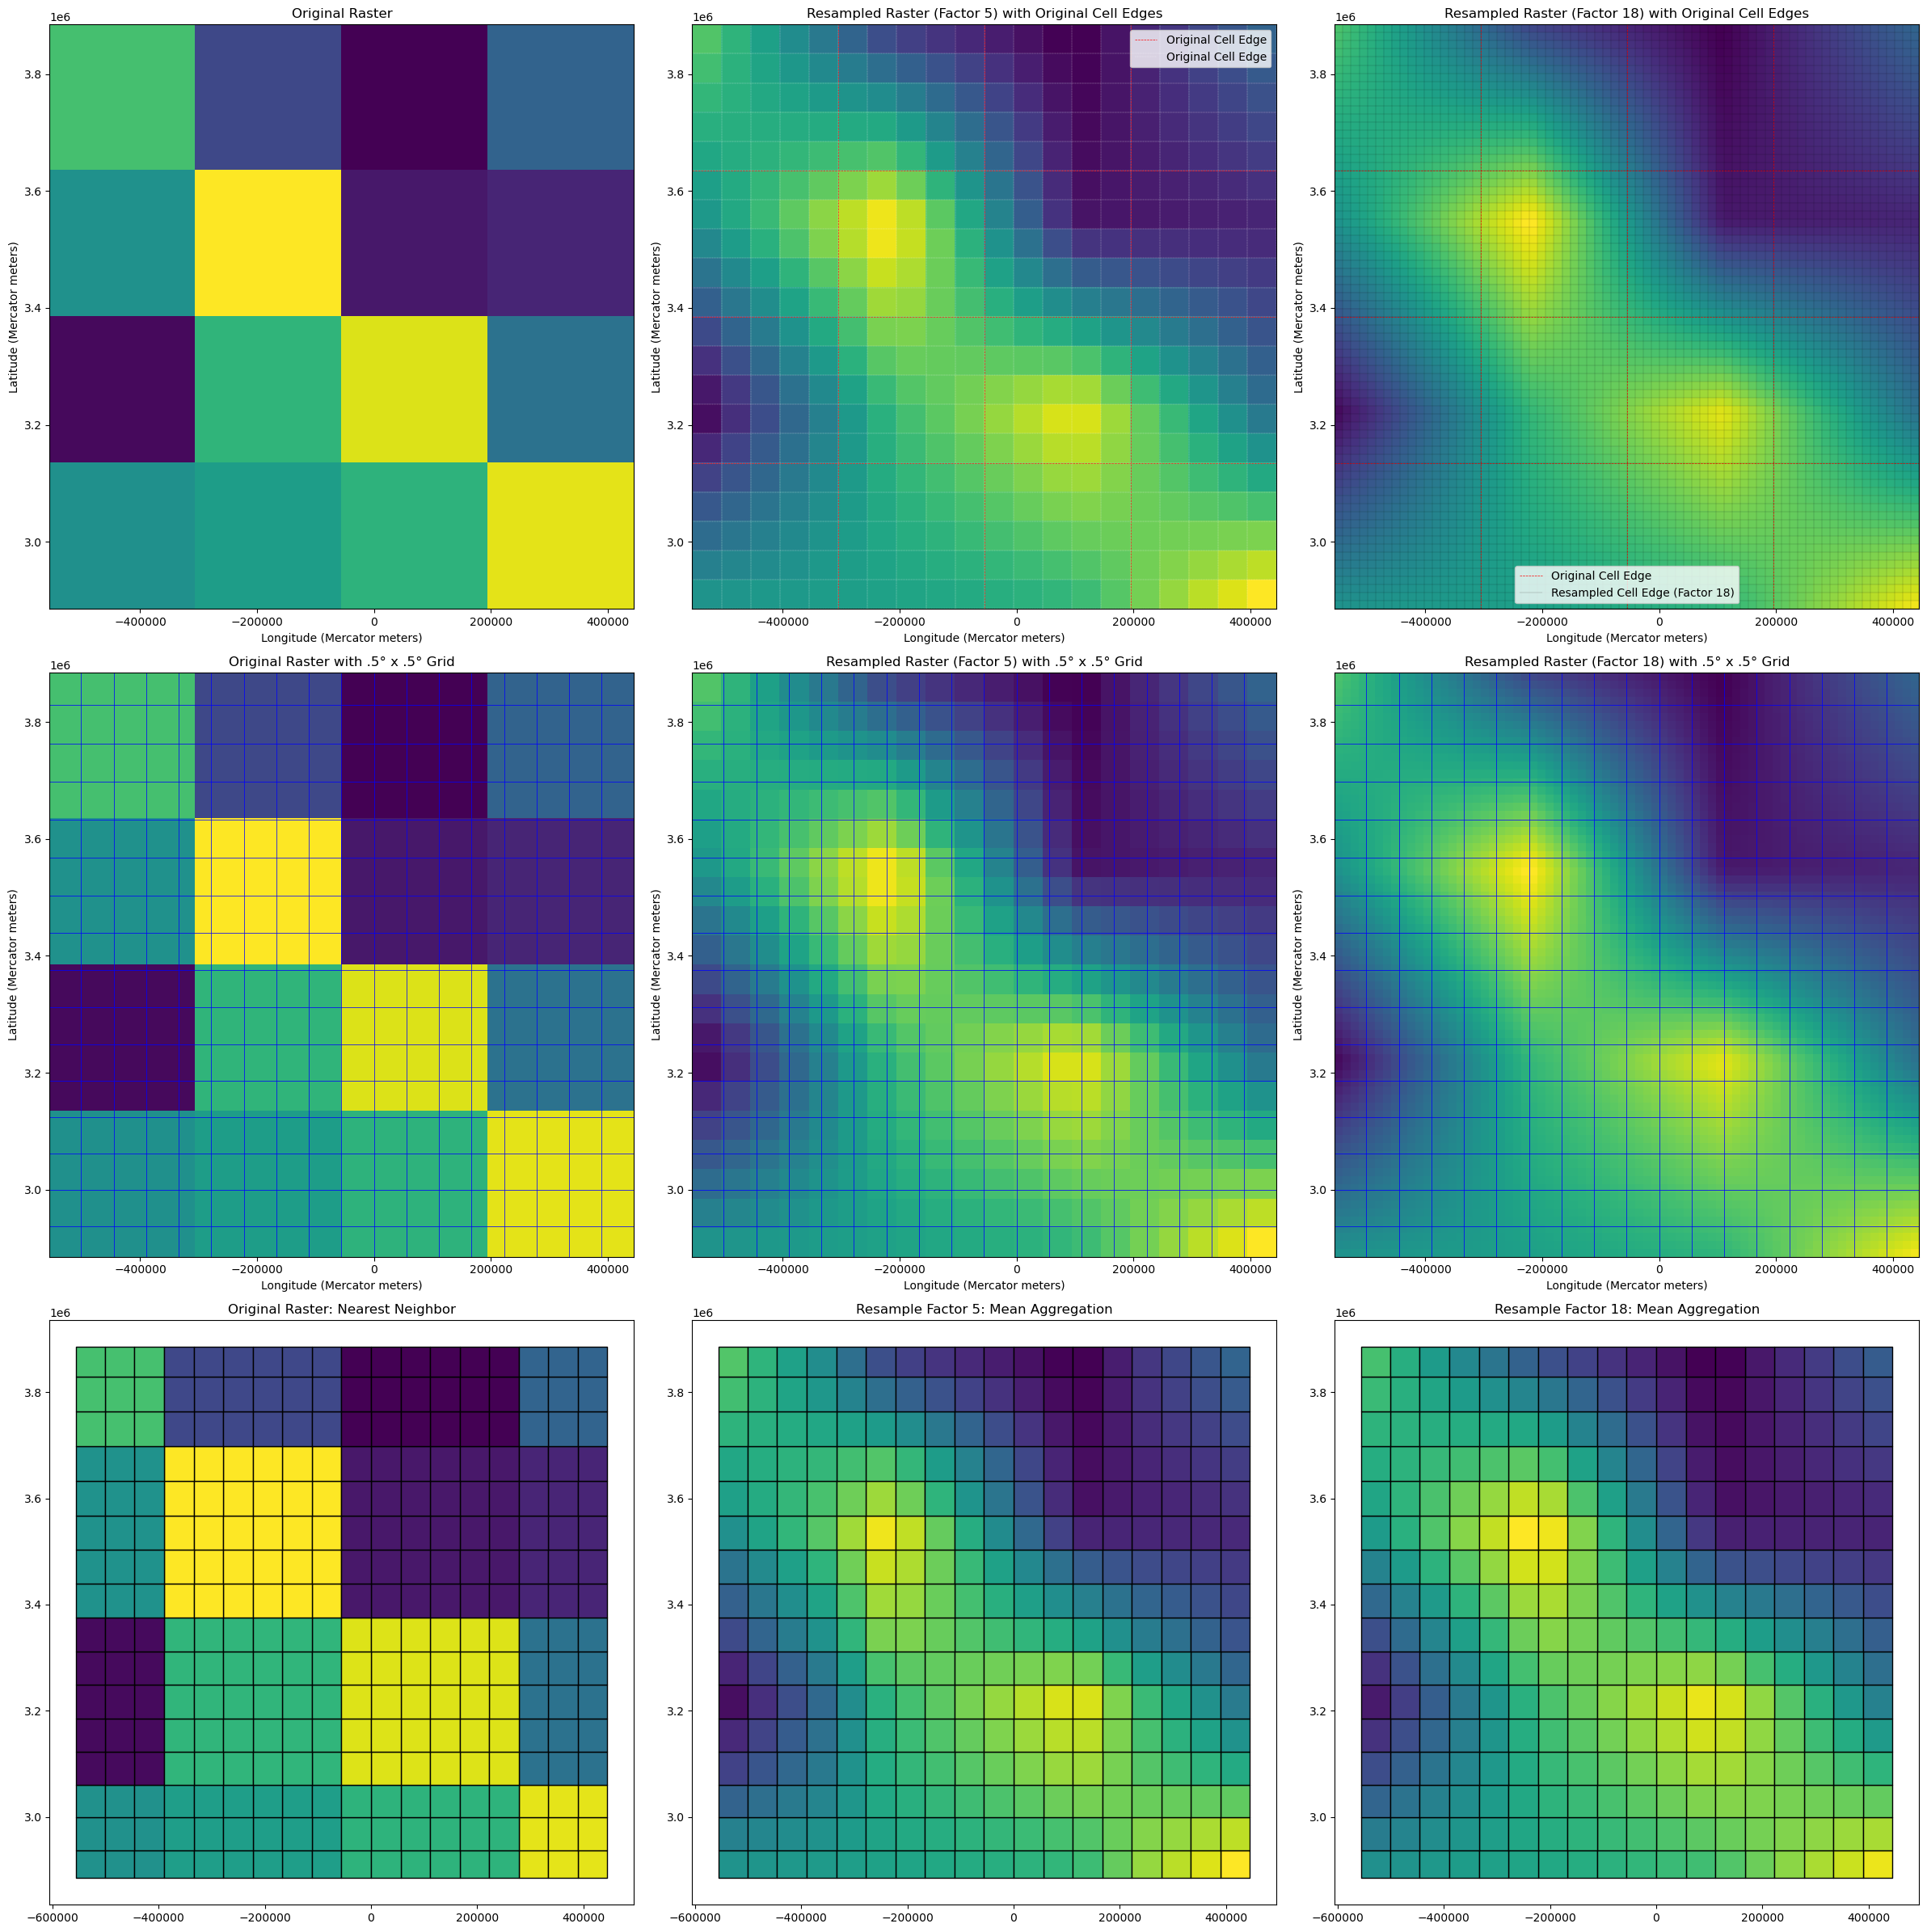

In [85]:
from scipy.ndimage import zoom
from shapely.geometry import box
from scipy.spatial import cKDTree
import numpy as np
import rasterio
from rasterio.transform import from_bounds
from rasterstats import zonal_stats

# Open the raster file
with rasterio.open(raster_file) as src:
    raster_data = src.read(1)  # Read the first (and only) band
    extent = [
        src.bounds.left,
        src.bounds.right,
        src.bounds.bottom,
        src.bounds.top,
    ]

# Create the bounding box for the raster extent
raster_bounds = box(extent[0], extent[2], extent[1], extent[3])

# Clip GDF to raster extent
gdf_05_mercator = gdf_05_mercator.to_crs("EPSG:3857").clip(raster_bounds)
#--------------------------------------------------------------------------------------------------
# RESAMPLE ORIGINAL RASTER
#--------------------------------------------------------------------------------------------------
# Define resampling factors
factor_5 = 5
factor_18 = 18

# Resample the raster data using bilinear interpolation (order=1)
resampled_data_factor_5 = zoom(raster_data, factor_5, order=1)
resampled_data_factor_18 = zoom(raster_data, factor_18, order=1)
#--------------------------------------------------------------------------------------------------
# SAVE RESAMPLED RASTER
#--------------------------------------------------------------------------------------------------
# Save resampled data (factor 5) as GeoTIFF
with rasterio.open(
    "resampled_factor_5.tif",
    "w",
    driver="GTiff",
    height=resampled_data_factor_5.shape[0],
    width=resampled_data_factor_5.shape[1],
    count=1,
    dtype=resampled_data_factor_5.dtype,
    crs="EPSG:3857",  # Use the CRS of your GeoDataFrame
    transform=from_bounds(extent[0], extent[2], extent[1], extent[3], 
                           resampled_data_factor_5.shape[1], 
                           resampled_data_factor_5.shape[0])
) as dst:
    dst.write(resampled_data_factor_5, 1)

# Save resampled data (factor 18) as GeoTIFF
with rasterio.open(
    "resampled_factor_18.tif",
    "w",
    driver="GTiff",
    height=resampled_data_factor_18.shape[0],
    width=resampled_data_factor_18.shape[1],
    count=1,
    dtype=resampled_data_factor_18.dtype,
    crs="EPSG:3857",
    transform=from_bounds(extent[0], extent[2], extent[1], extent[3], 
                           resampled_data_factor_18.shape[1], 
                           resampled_data_factor_18.shape[0])
) as dst:
    dst.write(resampled_data_factor_18, 1)
#--------------------------------------------------------------------------------------------------
# GENERATE MEAN STATS FROM RASTER TO GEOPANDAS DATAFRAME
#--------------------------------------------------------------------------------------------------
# Compute mean statistics for resample factor 5
zonal_stats_resample_5 = zonal_stats(
    gdf_05_mercator,
    "resampled_factor_5.tif",
    stats="mean",
    geojson_out=True
)
gdf_05_mercator["mean_resample_5"] = [feature["properties"]["mean"] for feature in zonal_stats_resample_5]

# Compute mean statistics for resample factor 18
zonal_stats_resample_18 = zonal_stats(
    gdf_05_mercator,
    "resampled_factor_18.tif",
    stats="mean",
    geojson_out=True
)
gdf_05_mercator["mean_resample_18"] = [feature["properties"]["mean"] for feature in zonal_stats_resample_18]
#--------------------------------------------------------------------------------------------------
# This gives us the raster boundaries to plot
#--------------------------------------------------------------------------------------------------
# Calculate the edges of the original raster cells
original_x_edges = np.linspace(extent[0], extent[1], raster_data.shape[1] + 1)
original_y_edges = np.linspace(extent[2], extent[3], raster_data.shape[0] + 1)

# Calculate the edges of the original raster cells
factor5_x_edges = np.linspace(extent[0], extent[1], resampled_data_factor_5.shape[1] + 1)
factor5_y_edges = np.linspace(extent[2], extent[3], resampled_data_factor_5.shape[0] + 1)

# Calculate the edges of the original raster cells
factor18_x_edges = np.linspace(extent[0], extent[1], resampled_data_factor_18.shape[1] + 1)
factor18_y_edges = np.linspace(extent[2], extent[3], resampled_data_factor_18.shape[0] + 1)
#--------------------------------------------------------------------------------------------------
# NEAREST NEIGHBOR METHOD FROM ORIGINAL RASTER TO GEOPANDAS DATAFRAME
#--------------------------------------------------------------------------------------------------
# Get the center points of the GeoDataFrame cells
gdf_centroids = gdf_05_mercator.centroid
gdf_x_centers = gdf_centroids.x.values
gdf_y_centers = gdf_centroids.y.values

# Get the raster cell centers for the original raster
original_x_centers = np.linspace(extent[0], extent[1], raster_data.shape[1])
original_y_centers = np.linspace(extent[3], extent[2], raster_data.shape[0])  # Inverted y-axis
original_xx, original_yy = np.meshgrid(original_x_centers, original_y_centers)
original_points = np.c_[original_xx.ravel(), original_yy.ravel()]

# Build KDTree for the original raster
tree_original = cKDTree(original_points)

# Query the nearest raster values for GeoDataFrame centroids
query_points = np.c_[gdf_x_centers, gdf_y_centers]
distances, indices = tree_original.query(query_points)

# Assign nearest raster values to the GeoDataFrame
gdf_05_mercator["nearest_original"] = raster_data.ravel()[indices]
#--------------------------------------------------------------------------------------------------
# MEAN FROM RESAMPLED RASTERS
#--------------------------------------------------------------------------------------------------
# Compute mean statistics for resample factor 5
zonal_stats_resample_5 = zonal_stats(
    gdf_05_mercator,
    "resampled_factor_5.tif",
    stats="mean",
    geojson_out=True
)
gdf_05_mercator["mean_resample_5"] = [feature["properties"]["mean"] for feature in zonal_stats_resample_5]

# Compute mean statistics for resample factor 18
zonal_stats_resample_18 = zonal_stats(
    gdf_05_mercator,
    "resampled_factor_18.tif",
    stats="mean",
    geojson_out=True
)
gdf_05_mercator["mean_resample_18"] = [feature["properties"]["mean"] for feature in zonal_stats_resample_18]
#--------------------------------------------------------------------------------------------------
# PLOT ALL THE DATA
#--------------------------------------------------------------------------------------------------
# Plot the original raster, resampled rasters, and overlays in a 2x3 layout
fig, ax = plt.subplots(3, 3, figsize=(24, 24))

# Top row: Original raster and resampled rasters with original cell edges overlaid

# Original raster (top left)
ax[0, 0].imshow(raster_data, extent=extent, origin="upper", cmap="viridis")
ax[0, 0].set_title("Original Raster")
ax[0, 0].set_xlabel("Longitude (Mercator meters)")
ax[0, 0].set_ylabel("Latitude (Mercator meters)")

# Resampled raster with factor 5 (top middle)
ax[0, 1].imshow(resampled_data_factor_5, extent=extent, origin="upper", cmap="viridis")
for x in original_x_edges:
    ax[0, 1].axvline(x, color="red", linewidth=0.5, linestyle="--", label="Original Cell Edge" if x == original_x_edges[0] else None)
for y in original_y_edges:
    ax[0, 1].axhline(y, color="red", linewidth=0.5, linestyle="--")

for x in factor5_x_edges:
    ax[0, 1].axvline(x, color="white", linewidth=0.2, linestyle="--", label="Original Cell Edge" if x == factor5_x_edges[0] else None)
for y in factor5_y_edges:
    ax[0, 1].axhline(y, color="white", linewidth=0.2, linestyle="--")

ax[0, 1].set_title("Resampled Raster (Factor 5) with Original Cell Edges")
ax[0, 1].set_xlabel("Longitude (Mercator meters)")
ax[0, 1].set_ylabel("Latitude (Mercator meters)")
ax[0, 1].legend()

# Resampled raster with factor 18 (top right)
ax[0, 2].imshow(resampled_data_factor_18, extent=extent, origin="upper", cmap="viridis")

for x in original_x_edges:
    ax[0, 2].axvline(x, color="red", linewidth=0.5, linestyle="--", label="Original Cell Edge" if x == original_x_edges[0] else None)
for y in original_y_edges:
    ax[0, 2].axhline(y, color="red", linewidth=0.5, linestyle="--")

for x in factor18_x_edges:
    ax[0, 2].axvline(x, color="black", linewidth=0.1, linestyle="-", label="Resampled Cell Edge (Factor 18)" if x == factor18_x_edges[0] else None)
for y in factor18_y_edges:
    ax[0, 2].axhline(y, color="black", linewidth=0.1, linestyle="-")

ax[0, 2].set_title("Resampled Raster (Factor 18) with Original Cell Edges")
ax[0, 2].set_xlabel("Longitude (Mercator meters)")
ax[0, 2].set_ylabel("Latitude (Mercator meters)")
ax[0, 2].legend()

# Middle row: Rasters with .5° x .5° GeoDataFrame overlay

# Original raster with .5° x .5° grid (bottom left)
ax[1, 0].imshow(raster_data, extent=extent, origin="upper", cmap="viridis")
gdf_05_mercator.plot(ax=ax[1, 0], edgecolor="blue", facecolor="none", linewidth=0.5, alpha=0.7)
ax[1, 0].set_title("Original Raster with .5° x .5° Grid")
ax[1, 0].set_xlabel("Longitude (Mercator meters)")
ax[1, 0].set_ylabel("Latitude (Mercator meters)")

# Resampled raster with factor 5 and .5° x .5° grid (bottom middle)
ax[1, 1].imshow(resampled_data_factor_5, extent=extent, origin="upper", cmap="viridis")
gdf_05_mercator.plot(ax=ax[1, 1], edgecolor="blue", facecolor="none", linewidth=0.5, alpha=0.7)
ax[1, 1].set_title("Resampled Raster (Factor 5) with .5° x .5° Grid")
ax[1, 1].set_xlabel("Longitude (Mercator meters)")
ax[1, 1].set_ylabel("Latitude (Mercator meters)")

# Resampled raster with factor 18 and .5° x .5° grid (bottom right)
ax[1, 2].imshow(resampled_data_factor_18, extent=extent, origin="upper", cmap="viridis")
gdf_05_mercator.plot(ax=ax[1, 2], edgecolor="blue", facecolor="none", linewidth=0.5, alpha=0.7)
ax[1, 2].set_title("Resampled Raster (Factor 18) with .5° x .5° Grid")
ax[1, 2].set_xlabel("Longitude (Mercator meters)")
ax[1, 2].set_ylabel("Latitude (Mercator meters)")
#--------------------------------------------------------
# Bottom row: Rasters with .5° x .5° GeoDataFrame overlay
#--------------------------------------------------------
# Original raster nearest neighbor plot
gdf_05_mercator.plot(column="nearest_original", cmap="viridis", ax=ax[2,0], edgecolor="black")
ax[2,0].set_title("Original Raster: Nearest Neighbor")

# Resample factor 5 mean aggregation plot
gdf_05_mercator.plot(column="mean_resample_5", cmap="viridis", ax=ax[2,1], edgecolor="black")
ax[2,1].set_title("Resample Factor 5: Mean Aggregation")

# Resample factor 18 mean aggregation plot
gdf_05_mercator.plot(column="mean_resample_18", cmap="viridis", ax=ax[2,2], edgecolor="black")
ax[2,2].set_title("Resample Factor 18: Mean Aggregation")

plt.tight_layout()
plt.show()

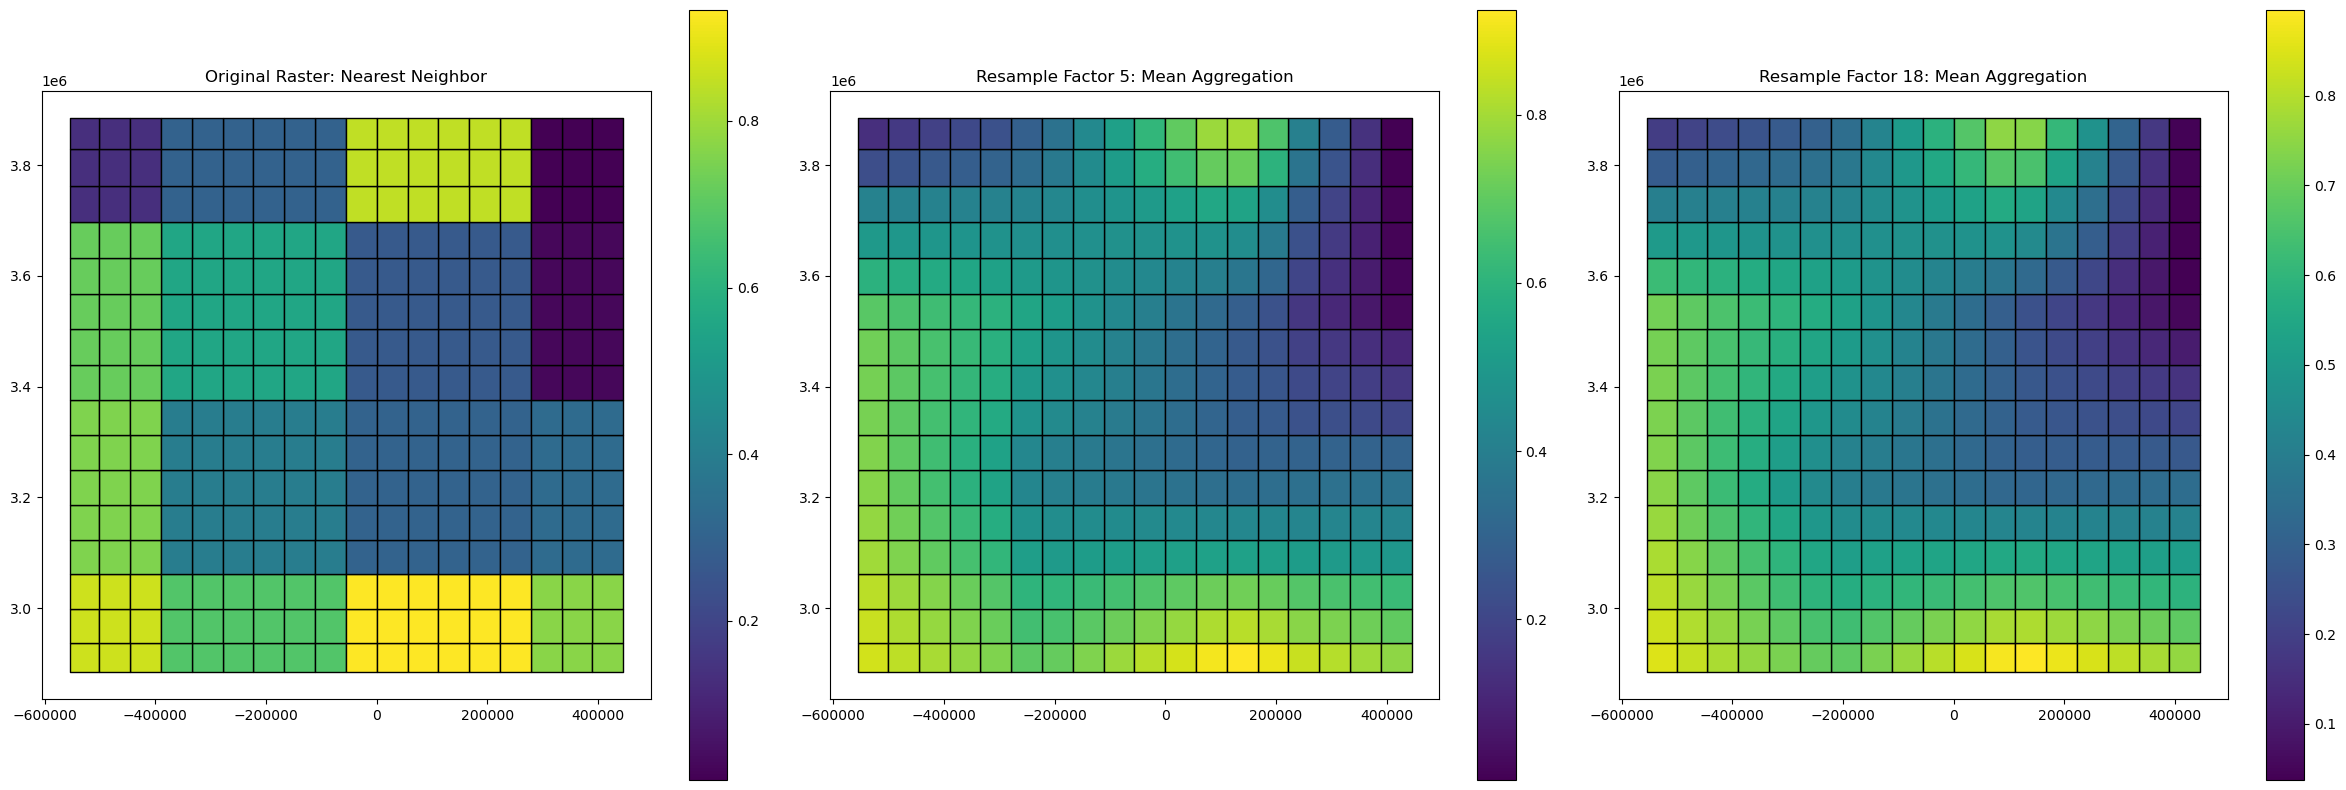

In [59]:
from scipy.ndimage import zoom
from shapely.geometry import box
from scipy.spatial import cKDTree
import numpy as np
import rasterio
from rasterio.transform import from_bounds

# Open the raster file
with rasterio.open(raster_file) as src:
    raster_data = src.read(1)  # Read the first (and only) band
    extent = [
        src.bounds.left,
        src.bounds.right,
        src.bounds.bottom,
        src.bounds.top,
    ]


# Create the bounding box for the raster extent
raster_bounds = box(extent[0], extent[2], extent[1], extent[3])

# Clip GDF to raster extent
gdf_05_mercator = gdf_05_mercator.to_crs("EPSG:3857").clip(raster_bounds)

   
# Define resampling factors
factor_5 = 5
factor_18 = 18

# Resample the raster data using bilinear interpolation (order=1)
resampled_data_factor_5 = zoom(raster_data, factor_5, order=1)
resampled_data_factor_18 = zoom(raster_data, factor_18, order=1)

import rasterio
from rasterio.transform import from_bounds

# Save resampled data (factor 5) as GeoTIFF
with rasterio.open(
    "resampled_factor_5.tif",
    "w",
    driver="GTiff",
    height=resampled_data_factor_5.shape[0],
    width=resampled_data_factor_5.shape[1],
    count=1,
    dtype=resampled_data_factor_5.dtype,
    crs="EPSG:3857",  # Use the CRS of your GeoDataFrame
    transform=from_bounds(extent[0], extent[2], extent[1], extent[3], 
                           resampled_data_factor_5.shape[1], 
                           resampled_data_factor_5.shape[0])
) as dst:
    dst.write(resampled_data_factor_5, 1)

# Save resampled data (factor 18) as GeoTIFF
with rasterio.open(
    "resampled_factor_18.tif",
    "w",
    driver="GTiff",
    height=resampled_data_factor_18.shape[0],
    width=resampled_data_factor_18.shape[1],
    count=1,
    dtype=resampled_data_factor_18.dtype,
    crs="EPSG:3857",
    transform=from_bounds(extent[0], extent[2], extent[1], extent[3], 
                           resampled_data_factor_18.shape[1], 
                           resampled_data_factor_18.shape[0])
) as dst:
    dst.write(resampled_data_factor_18, 1)


# Calculate the edges of the original raster cells
original_x_edges = np.linspace(extent[0], extent[1], raster_data.shape[1] + 1)
original_y_edges = np.linspace(extent[2], extent[3], raster_data.shape[0] + 1)

# Calculate the edges of the original raster cells
factor5_x_edges = np.linspace(extent[0], extent[1], resampled_data_factor_5.shape[1] + 1)
factor5_y_edges = np.linspace(extent[2], extent[3], resampled_data_factor_5.shape[0] + 1)

# Calculate the edges of the original raster cells
factor18_x_edges = np.linspace(extent[0], extent[1], resampled_data_factor_18.shape[1] + 1)
factor18_y_edges = np.linspace(extent[2], extent[3], resampled_data_factor_18.shape[0] + 1)


#-----------------------------------------------------------------------------------------------------------
# Initialize results for each GeoDataFrame cell
gdf_05_mercator["original_value"] = None
gdf_05_mercator["resample_5_mean"] = None
gdf_05_mercator["resample_18_mean"] = None

# Get the center points of each GeoDataFrame cell
gdf_centroids = gdf_05_mercator.centroid
gdf_x_centers = gdf_centroids.x.values
gdf_y_centers = gdf_centroids.y.values

# Get raster data centers with corrected y-axis inversion
original_x_centers = np.linspace(extent[0], extent[1], raster_data.shape[1])
original_y_centers = np.linspace(extent[3], extent[2], raster_data.shape[0])  # Note: y-axis inverted
original_xx, original_yy = np.meshgrid(original_x_centers, original_y_centers)
original_points = np.c_[original_xx.ravel(), original_yy.ravel()]

# Build KDTree for the original raster
tree_original = cKDTree(original_points)

# Query nearest raster values for GeoDataFrame centroids
query_points = np.c_[gdf_x_centers, gdf_y_centers]
distances, indices = tree_original.query(query_points)

# Assign nearest raster values to GeoDataFrame cells
gdf_05_mercator["original_value"] = raster_data.ravel()[indices]

# Process resampled rasters (mean aggregation)
def calculate_means(grid_data, x_edges, y_edges, gdf_x_centers, gdf_y_centers):
    """Calculate the mean raster value for each GeoDataFrame cell with y-axis inversion."""
    # Invert y-edges to match geographic origin
    y_edges = y_edges[::-1]
    means = []
    for x, y in zip(gdf_x_centers, gdf_y_centers):
        # Find the indices of the raster cells within each GeoDataFrame cell
        mask_x = (x_edges[:-1] <= x) & (x_edges[1:] > x)
        mask_y = (y_edges[:-1] >= y) & (y_edges[1:] < y)  # Inverted comparison for y
        mask = np.outer(mask_y, mask_x)
        if np.any(mask):
            means.append(np.mean(grid_data[mask]))
        else:
            means.append(None)
    return means

# Calculate means for resample factor 5
resampled_x_edges_5 = np.linspace(extent[0], extent[1], resampled_data_factor_5.shape[1] + 1)
resampled_y_edges_5 = np.linspace(extent[3], extent[2], resampled_data_factor_5.shape[0] + 1)  # Invert y-axis
gdf_05_mercator["resample_5_mean"] = calculate_means(
    resampled_data_factor_5, resampled_x_edges_5, resampled_y_edges_5, gdf_x_centers, gdf_y_centers
)

# Calculate means for resample factor 18
resampled_x_edges_18 = np.linspace(extent[0], extent[1], resampled_data_factor_18.shape[1] + 1)
resampled_y_edges_18 = np.linspace(extent[3], extent[2], resampled_data_factor_18.shape[0] + 1)  # Invert y-axis
gdf_05_mercator["resample_18_mean"] = calculate_means(
    resampled_data_factor_18, resampled_x_edges_18, resampled_y_edges_18, gdf_x_centers, gdf_y_centers
)
#-----------------------------------------------------------------------------------------------------------



# Plot the original raster, resampled rasters, and overlays in a 2x3 layout
fig, ax = plt.subplots(3, 3, figsize=(24, 24))

# Top row: Original raster and resampled rasters with original cell edges overlaid

# Original raster (top left)
ax[0, 0].imshow(raster_data, extent=extent, origin="upper", cmap="viridis")
ax[0, 0].set_title("Original Raster")
ax[0, 0].set_xlabel("Longitude (Mercator meters)")
ax[0, 0].set_ylabel("Latitude (Mercator meters)")

# Resampled raster with factor 5 (top middle)
ax[0, 1].imshow(resampled_data_factor_5, extent=extent, origin="upper", cmap="viridis")
for x in original_x_edges:
    ax[0, 1].axvline(x, color="red", linewidth=0.5, linestyle="--", label="Original Cell Edge" if x == original_x_edges[0] else None)
for y in original_y_edges:
    ax[0, 1].axhline(y, color="red", linewidth=0.5, linestyle="--")

for x in factor5_x_edges:
    ax[0, 1].axvline(x, color="white", linewidth=0.2, linestyle="--", label="Original Cell Edge" if x == factor5_x_edges[0] else None)
for y in factor5_y_edges:
    ax[0, 1].axhline(y, color="white", linewidth=0.2, linestyle="--")

ax[0, 1].set_title("Resampled Raster (Factor 5) with Original Cell Edges")
ax[0, 1].set_xlabel("Longitude (Mercator meters)")
ax[0, 1].set_ylabel("Latitude (Mercator meters)")
ax[0, 1].legend()

# Resampled raster with factor 18 (top right)
ax[0, 2].imshow(resampled_data_factor_18, extent=extent, origin="upper", cmap="viridis")

for x in original_x_edges:
    ax[0, 2].axvline(x, color="red", linewidth=0.5, linestyle="--", label="Original Cell Edge" if x == original_x_edges[0] else None)
for y in original_y_edges:
    ax[0, 2].axhline(y, color="red", linewidth=0.5, linestyle="--")

for x in factor18_x_edges:
    ax[0, 2].axvline(x, color="black", linewidth=0.1, linestyle="-", label="Resampled Cell Edge (Factor 18)" if x == factor18_x_edges[0] else None)
for y in factor18_y_edges:
    ax[0, 2].axhline(y, color="black", linewidth=0.1, linestyle="-")

ax[0, 2].set_title("Resampled Raster (Factor 18) with Original Cell Edges")
ax[0, 2].set_xlabel("Longitude (Mercator meters)")
ax[0, 2].set_ylabel("Latitude (Mercator meters)")
ax[0, 2].legend()

# Middle row: Rasters with .5° x .5° GeoDataFrame overlay

# Original raster with .5° x .5° grid (bottom left)
ax[1, 0].imshow(raster_data, extent=extent, origin="upper", cmap="viridis")
gdf_05_mercator.plot(ax=ax[1, 0], edgecolor="blue", facecolor="none", linewidth=0.5, alpha=0.7)
ax[1, 0].set_title("Original Raster with .5° x .5° Grid")
ax[1, 0].set_xlabel("Longitude (Mercator meters)")
ax[1, 0].set_ylabel("Latitude (Mercator meters)")

# Resampled raster with factor 5 and .5° x .5° grid (bottom middle)
ax[1, 1].imshow(resampled_data_factor_5, extent=extent, origin="upper", cmap="viridis")
gdf_05_mercator.plot(ax=ax[1, 1], edgecolor="blue", facecolor="none", linewidth=0.5, alpha=0.7)
ax[1, 1].set_title("Resampled Raster (Factor 5) with .5° x .5° Grid")
ax[1, 1].set_xlabel("Longitude (Mercator meters)")
ax[1, 1].set_ylabel("Latitude (Mercator meters)")

# Resampled raster with factor 18 and .5° x .5° grid (bottom right)
ax[1, 2].imshow(resampled_data_factor_18, extent=extent, origin="upper", cmap="viridis")
gdf_05_mercator.plot(ax=ax[1, 2], edgecolor="blue", facecolor="none", linewidth=0.5, alpha=0.7)
ax[1, 2].set_title("Resampled Raster (Factor 18) with .5° x .5° Grid")
ax[1, 2].set_xlabel("Longitude (Mercator meters)")
ax[1, 2].set_ylabel("Latitude (Mercator meters)")

#--------------------------------------------------------
# Bottom row: Rasters with .5° x .5° GeoDataFrame overlay
#--------------------------------------------------------

# Original raster nearest neighbor plot
gdf_05_mercator.plot(column="original_value", cmap="viridis", ax=ax[2,0], edgecolor="black")
ax[2,0].set_title("Original Raster: Nearest Neighbor")

# Resample factor 5 mean aggregation plot
gdf_05_mercator.plot(column="resample_5_mean", cmap="viridis", ax=ax[2,1], edgecolor="black")
ax[2,1].set_title("Resample Factor 5: Mean Aggregation")

# Resample factor 18 mean aggregation plot
gdf_05_mercator.plot(column="resample_18_mean", cmap="viridis", ax=ax[2,2], edgecolor="black")
ax[2,2].set_title("Resample Factor 18: Mean Aggregation")


plt.tight_layout()
plt.show()